In [1]:
import pygly2
from pygly2.io import glycoct
from pygly2.structure import (glycan, monosaccharide, substituent)

from pygly2 import plot
from pygly2.algorithms import subtree_search, database

%matplotlib inline

In [2]:
human_glycomedb = database.RecordDatabase("./human_glycomedb.db")

In [7]:
map(dict, human_glycomedb.execute("select composition from {table_name} limit 100;"))

[{'composition': u'Hex:3 HexNAc:1'},
 {'composition': u'Hex:3 HexNAc:1'},
 {'composition': u'Hex:1 HexNAc:1'},
 {'composition': u'Hex:1 HexNAc:1 dHex:1'},
 {'composition': u'Rha:1 Hex:2'},
 {'composition': u'aHexMet:1 Xyl:2'},
 {'composition': u'Hex:1'},
 {'composition': u'aHexSul:1 Hex:3 HexNAc:1'},
 {'composition': u'Hex:3 HexNAc:1'},
 {'composition': u'Hex:1 HexNAc:2 dHex:1'},
 {'composition': u'Hex:2 NeuAc:2'},
 {'composition': u'Hex:2 HexNAc:1'},
 {'composition': u'Hex:2'},
 {'composition': u'Hex:2'},
 {'composition': u'Hex:2'},
 {'composition': u'Hex:2'},
 {'composition': u'Hex:2'},
 {'composition': u'Hex:2 HexNAc:1 NeuAc:1'},
 {'composition': u'Hex:3 HexNAc:1 NeuAc:4'},
 {'composition': u'HexNAc:1 NeuAc:1'},
 {'composition': u'aHex:1 Rha:1 Hex:2'},
 {'composition': u'Hex:2 Fru:1'},
 {'composition': u'ddHex:3'},
 {'composition': u'Xyl:1 Hex:3'},
 {'composition': u'Hex:1'},
 {'composition': u'Hex:3 HexNAc:1 dHex:1'},
 {'composition': u'Hex:2 NeuAc:1'},
 {'composition': u'HexNAc:1 

In [9]:
map(dict, human_glycomedb.execute("select composition from {table_name} where is_n_glycan=1;"))

[{'composition': u'Hex:5 HexNAc:4'},
 {'composition': u'Hex:7 HexNAc:6'},
 {'composition': u'Hex:3 HexNAc:6'},
 {'composition': u'Hex:5 HexNAc:4 NeuAc:1'},
 {'composition': u'Hex:5 HexNAc:4 NeuAc:1'},
 {'composition': u'Hex:6 HexNAc:5 NeuAc:3'},
 {'composition': u'dHex:1 Hex:5 HexNAc:4 NeuAc:2'},
 {'composition': u'dHex:1 Hex:5 HexNAc:4 NeuAc:2'},
 {'composition': u'Hex:6 HexNAc:5 dHex:1'},
 {'composition': u'Hex:7 HexNAc:6 dHex:1'},
 {'composition': u'Hex:7 HexNAc:6 dHex:1'},
 {'composition': u'Hex:7 HexNAc:6 dHex:1'},
 {'composition': u'NeuAc:1 Hex:5 HexNAc:4 dHex:2'},
 {'composition': u'NeuAc:2 Hex:6 HexNAc:5 dHex:1'},
 {'composition': u'Hex:5 HexNAc:2'},
 {'composition': u'Hex:6 HexNAc:2'},
 {'composition': u'Hex:7 HexNAc:2'},
 {'composition': u'Hex:7 HexNAc:2'},
 {'composition': u'Hex:8 HexNAc:2'},
 {'composition': u'Hex:8 HexNAc:2'},
 {'composition': u'Hex:9 HexNAc:2'},
 {'composition': u'Hex:5 HexNAc:6 dHex:1'},
 {'composition': u'Hex:7 HexNAc:2'},
 {'composition': u'Hex:9 HexNA

In [3]:
n_linked_core = pygly2.glycans["N-Linked Core"]

In [3]:
x=human_glycomedb[1]
x.update()

In [5]:
human_n_glycan = database.RecordDatabase("./human_n_glycan.db")
human_n_glycan.apply_schema()
assert len(human_n_glycan) == 0
for record in human_glycomedb:
    if subtree_search.subtree_of(n_linked_core, record.structure):
        human_n_glycan.create(record.structure)

In [6]:
human_n_glycan.apply_indices()

In [18]:
human_n_glycan = database.RecordDatabase("./human_n_glycan.db")
x=human_n_glycan[1]
print(x.mass())
x.update(mass_params=())
x.structure.root.ring_type is monosaccharide.RingType.open

1640.59217185


False

(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: x=0.8125 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0xa352e48>)

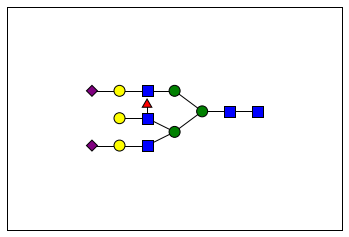

In [34]:
plot.plot(human_n_glycan[14], scale=0.13)

In [4]:
z = _

(341.213028439, 341.213028438858)

In [3]:
len(human_n_glycan)

NameError: name 'human_n_glycan' is not defined

In [10]:
human_n_glycan[14].structure.total_composition()

Composition({'H': 171, 'C': 104, 'O': 76, 'N': 7})

In [11]:
#human_n_glycan.record_type.find_like_composition(human_n_glycan, record=human_n_glycan[14])

In [12]:
monosaccharide.debug = True

In [4]:
x.update()

TypeError: to_update_sql() got multiple values for keyword argument 'inherits'